In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

from numpy import array
import matplotlib
%matplotlib inline

from matplotlib import pyplot as plt

# Ejercicio PCA 

Resuelve las siguientes preguntas

1. Carga y examina el conjunto de datos de Cáncer de mama

¿Cuántas variables tiene y que explica cada una?

In [2]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
cancer = pd.DataFrame(data=data.data,columns=data.feature_names)
cancer['target'] = pd.DataFrame(data=data.target)

In [4]:
cancer

mean radius  mean texture  ...  worst fractal dimension  target
0          17.99         10.38  ...                  0.11890       0
1          20.57         17.77  ...                  0.08902       0
2          19.69         21.25  ...                  0.08758       0
3          11.42         20.38  ...                  0.17300       0
4          20.29         14.34  ...                  0.07678       0
..           ...           ...  ...                      ...     ...
564        21.56         22.39  ...                  0.07115       0
565        20.13         28.25  ...                  0.06637       0
566        16.60         28.08  ...                  0.07820       0
567        20.60         29.33  ...                  0.12400       0
568         7.76         24.54  ...                  0.07039       1

[569 rows x 31 columns]

In [5]:
cancer.describe()

mean radius  mean texture  ...  worst fractal dimension      target
count   569.000000    569.000000  ...               569.000000  569.000000
mean     14.127292     19.289649  ...                 0.083946    0.627417
std       3.524049      4.301036  ...                 0.018061    0.483918
min       6.981000      9.710000  ...                 0.055040    0.000000
25%      11.700000     16.170000  ...                 0.071460    0.000000
50%      13.370000     18.840000  ...                 0.080040    1.000000
75%      15.780000     21.800000  ...                 0.092080    1.000000
max      28.110000     39.280000  ...                 0.207500    1.000000

[8 rows x 31 columns]

Tiene 30 variables mas el target que indica si es cancer de mama o no lo es. Cada una de ellas describe diferentes aspectos de la tomografia realizada como:

        - radios (promedio de las distancias del centro a los puntos en el perimetro)
        - textura (desviacion estandar de los valores gray-scale)
        - perimetro
        - area
        - smoothness (variacion local de las longitudes del radio)
        - compactness (perimetro^2 / area - 1.0)
        - concavidad 
        - puntos de concavidad (numero de puntos concavos en el contorno)
        - simetria 
        - dimension del fractal ("coastline approximation" - 1)

2. Haz un scatter plot de cada variable vs todas las demás (en la diagonal escribe el nombre de la variable)

¿Con qué variables te quedarías para hacer la clasificación del dataset?

In [6]:
data = load_breast_cancer()
X = data['data']
y = data['target']
etiqs = data.target_names
print(etiqs)
attrb = data.feature_names
print(attrb)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


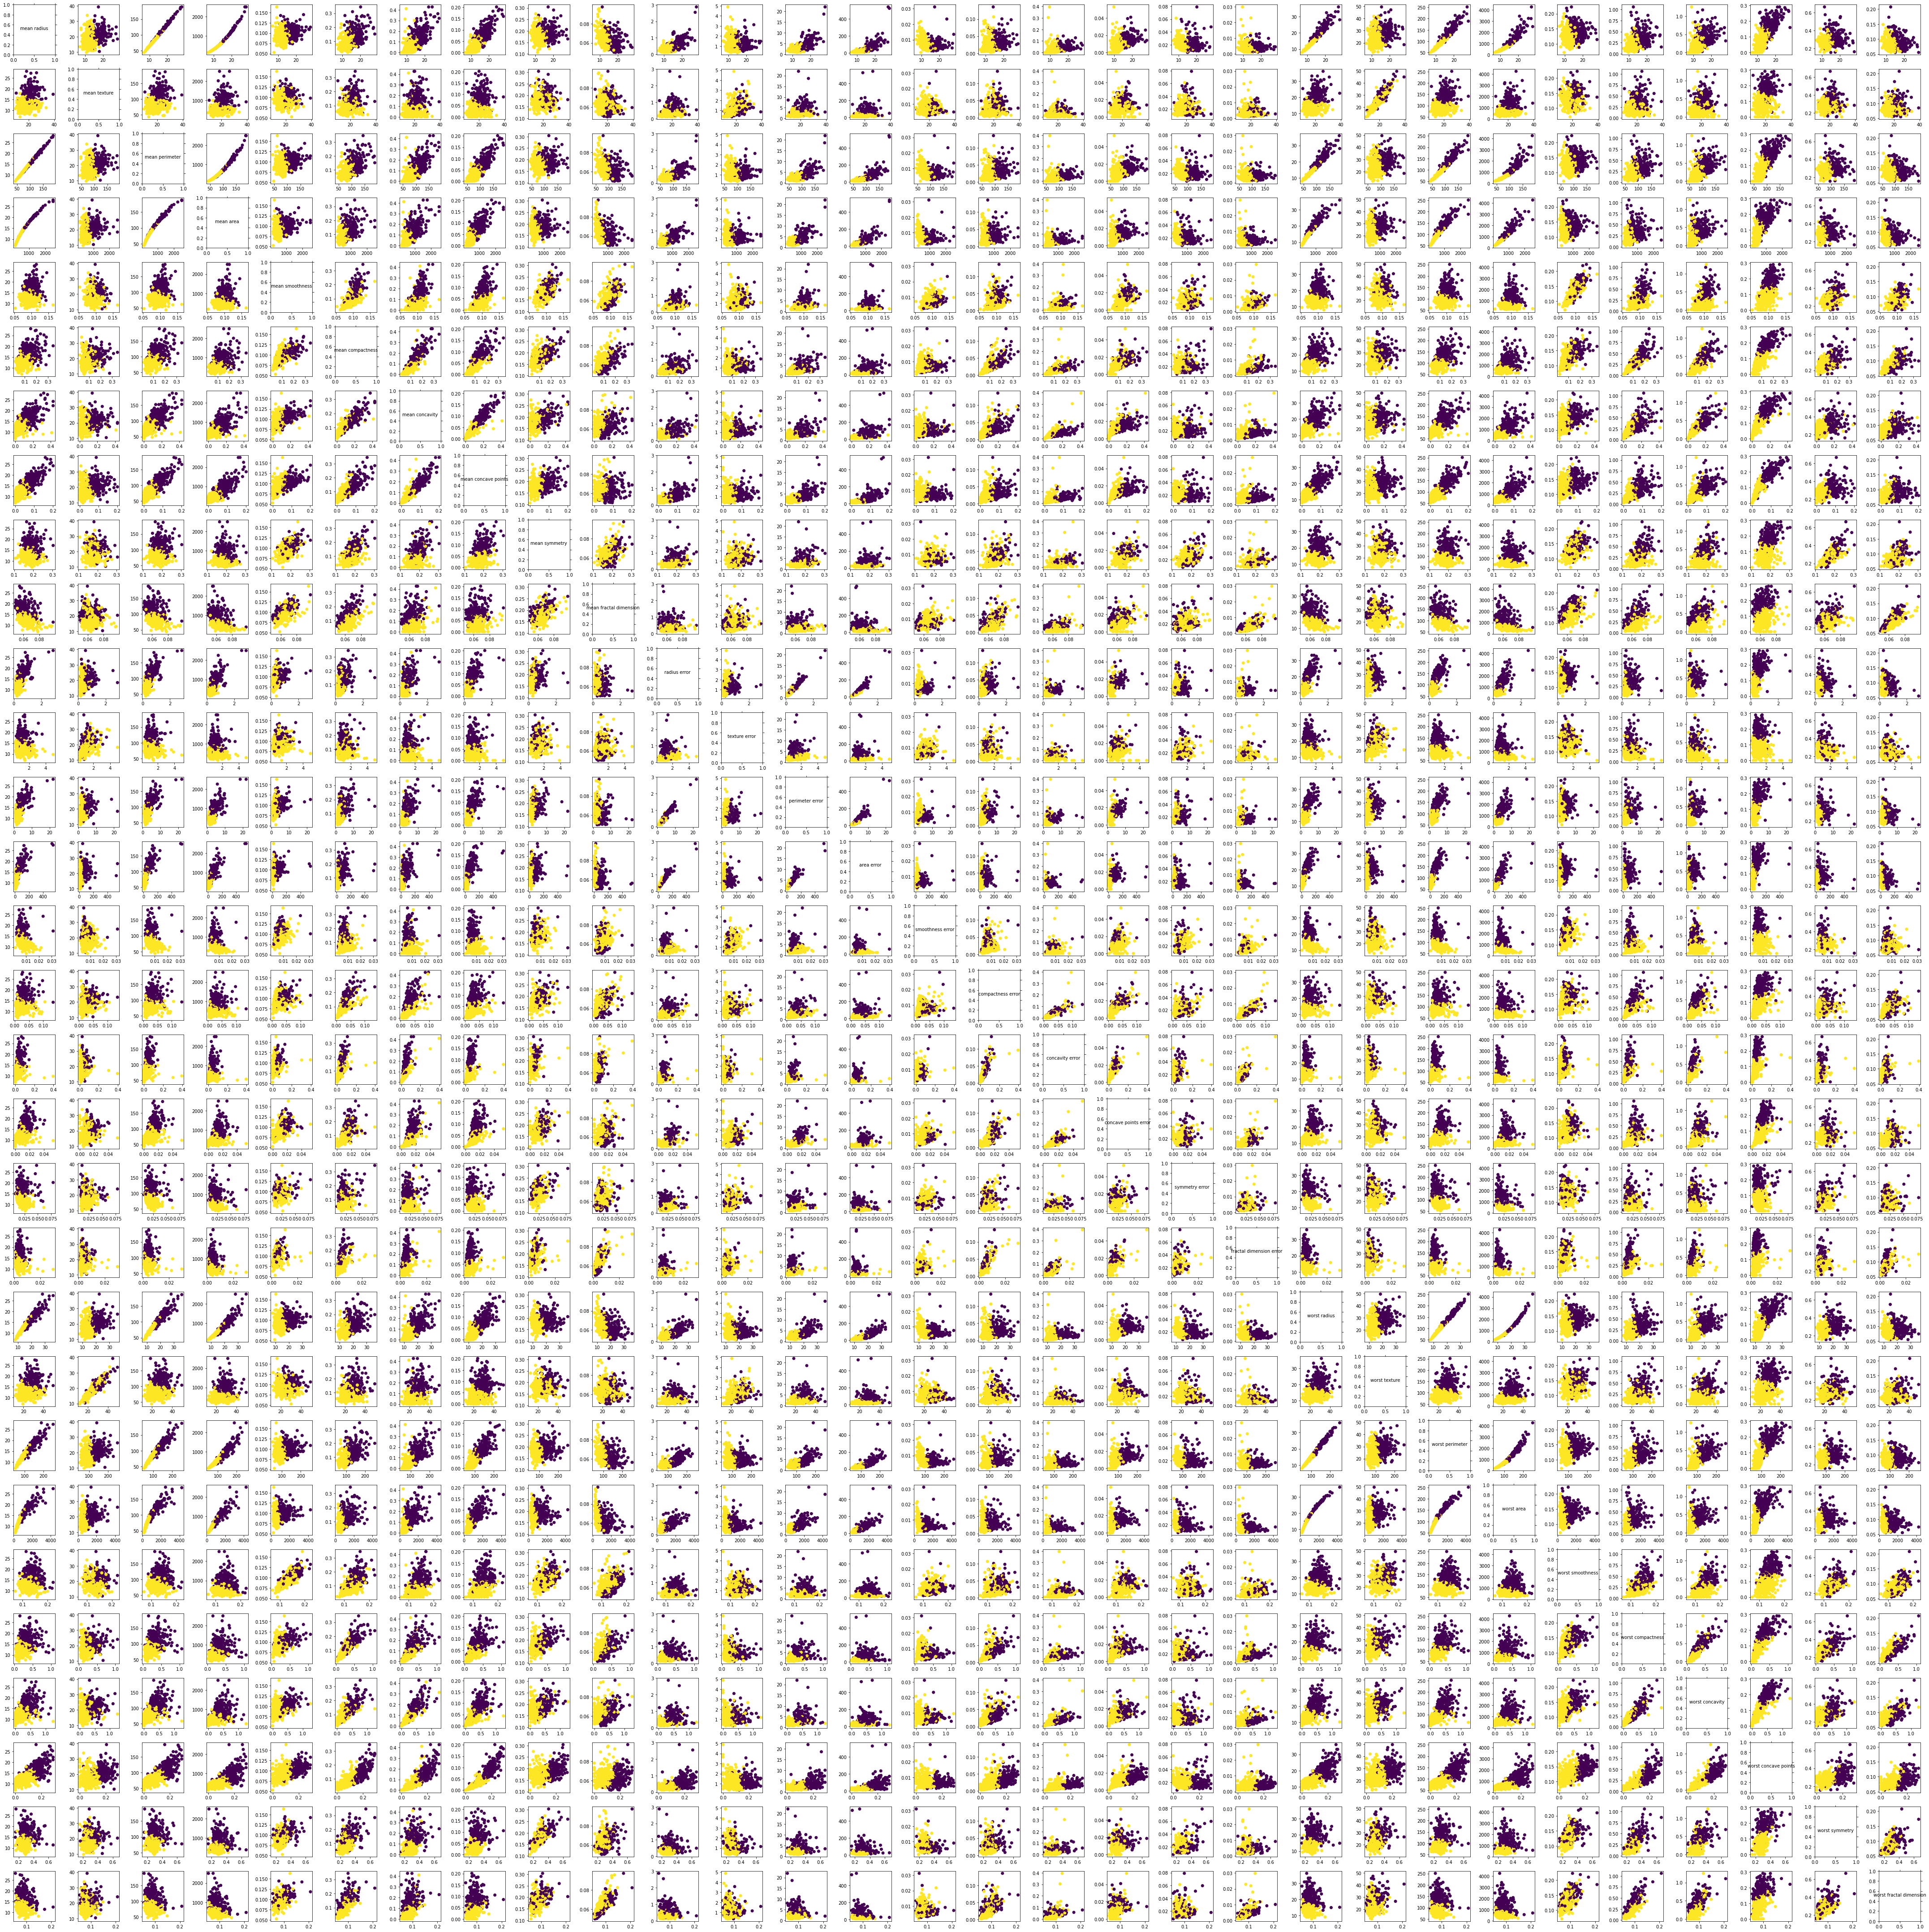

In [ ]:
fig, axes = plt.subplots(30,30, figsize=(60,60))
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i,j]
        if (i==j):
            ax.tick_params(
                axis='both',which='both',
                bottom='off',top='off',
                labelbottom='off',
                left='off',right='off',
                labelleft='off'
            )
            ax.text(0.5,0.5,attrb[i],horizontalalignment='center')
        else:
            ax.scatter(X[:,i],X[:,j],c=y)
fig.tight_layout()
plt.show()

Algunas de las variables que aparentemente se pueden separar linealmente son: radius error vs Worst concave point, mean radius vs area error...

3. Implementa la función de pca (esta vez usa `eigh`) y haz la transformación de tus datos.

In [23]:
def pca(data, dim):
    cov_mat = np.cov([data[i,:] for i in range(0,data.shape[1])])
    evals, evecs = np.linalg.eigh(cov_mat)
    sorted = np.argsort(evals)[::-1]
    evecs = evecs[:,sorted]
    evals = evals[sorted]
    evecs = evecs[:, :dim]
    return np.dot(evecs.T, data.T), evals

newColumns, var = pca(X,2)

In [24]:
newData = pd.DataFrame(data=newColumns.T,columns=['first','second'])
newData['target'] = pd.DataFrame(data=data.target)
newData

first      second  target
0    842.528711 -426.427106       0
1    836.522255 -419.583022       0
2    746.260801 -353.131377       0
3    268.427152 -106.569217       0
4    707.664256 -314.474399       0
..          ...         ...     ...
564  889.196990 -407.844841       0
565  762.282230 -353.398030       0
566  509.250495 -225.096591       0
567  798.233642 -375.866308       0
568  137.822129  -43.402321       1

[569 rows x 3 columns]

4. ¿Con cuántas variables puedes explicar al menos el 95% de la varianza?

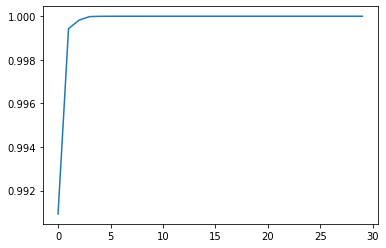

In [25]:
cumvar = np.array([x/sum(var) for x in var]).cumsum()
plt.clf()
plt.plot(cumvar)

De acuerdo a la grafica con 2 o 3.

5. Grafica los datos reducidos en 2 dimensiones usando la variable de clasificación para identificar un tipo de caso y el otro.

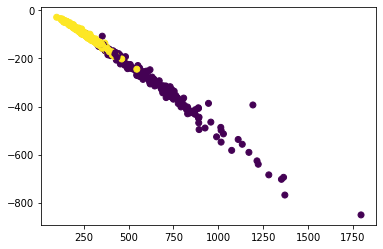

In [26]:
plt.scatter(newColumns.T[:,0], newColumns.T[:,1], c=y)


6. El dataset sonar captura en 60 variables si el objeto detectado es mina (M) o roca.

Puedes ver la especificación [aquí](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar%2C+Mines+vs.+Rocks%29)

In [29]:
columnas = [i for i in range(60)]+ ['clasif']
sonar_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", 
                            header=0)
sonar_dataset.columns = columnas
sonar_dataset.head()

0       1       2       3  ...      57      58      59  clasif
0  0.0453  0.0523  0.0843  0.0689  ...  0.0049  0.0052  0.0044       R
1  0.0262  0.0582  0.1099  0.1083  ...  0.0164  0.0095  0.0078       R
2  0.0100  0.0171  0.0623  0.0205  ...  0.0044  0.0040  0.0117       R
3  0.0762  0.0666  0.0481  0.0394  ...  0.0048  0.0107  0.0094       R
4  0.0286  0.0453  0.0277  0.0174  ...  0.0027  0.0051  0.0062       R

[5 rows x 61 columns]

Contesta las preguntas 4 y 5 para este dataset

4. ¿Con cuántas variables puedes explicar al menos el 95% de la varianza?

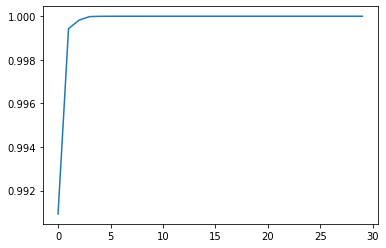

In [30]:
data = sonar_dataset
target = data['clasif']
dataM = data.drop('clasif',axis=1)
mines, vari = pca(dataM.to_numpy(),2)
cumvar = np.array([x/sum(var) for x in var]).cumsum()
plt.clf()
plt.plot(cumvar)

De acuerdo con la grafica son 2 o 3.

5. Grafica los datos reducidos en 2 dimensiones usando la variable de clasificación para identificar un tipo de caso y el otro.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """Entry point for launching an IPython kernel.


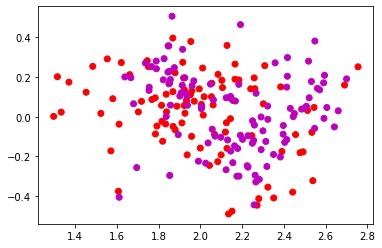

In [31]:
plt.scatter(mines.T[:,0], mines.T[:,1], c=target)